# Introduction to Machine Learning - Final Project - Group 7

Almog Asraf - 313200511

Daniel Pidtylok - 322558867

Nir Levanon - 313160715

## Imports

In [126]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_curve, auc, plot_roc_curve, confusion_matrix, plot_confusion_matrix, classification_report, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')


## Part A - Exploration

In [2]:
data = pd.read_csv("train.csv")

# X - all the data (the feature columns) , y - the label column - 0 or 1
X, y = data.iloc[:, :-1], data.iloc[:, -1]
train = X.drop('id', axis=1)
train.head()


,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,num_of_product_pages,...,ExitRates,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser
0,0.0,84.958154,Feb,0.0 minutes,0.20,0.0 minutes,NaN,1.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_1,0.0,safari_13
1,0.0,102.100162,Feb,64.0 minutes,0.00,0.0 minutes,NaN,2.0,0.0,2.0,...,0.10,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,chrome_89
2,0.0,100.991064,Feb,0.0 minutes,0.20,0.0 minutes,NaN,4.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,9.0,0.0,0.0,c_3,0.0,safari_15
3,0.0,120.605525,Feb,2.666666667 minutes,0.05,0.0 minutes,NaN,3.0,0.0,2.0,...,0.14,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_4,0.0,chrome_89
4,0.0,87.423708,Feb,627.5 minutes,0.02,0.0 minutes,NaN,3.0,NaN,10.0,...,0.05,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,1.0,browser_3_v9


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   closeness_to_holiday   9834 non-null   float64
 1   B                      10456 non-null  float64
 2   Month                  10458 non-null  object 
 3   product_page_duration  9872 non-null   object 
 4   BounceRates            10465 non-null  float64
 5   info_page_duration     10139 non-null  object 
 6   total_duration         5721 non-null   float64
 7   device                 10094 non-null  float64
 8   num_of_admin_pages     10031 non-null  float64
 9   num_of_product_pages   9962 non-null   float64
 10  C                      10461 non-null  object 
 11  ExitRates              10452 non-null  float64
 12  num_of_info_pages      9821 non-null   float64
 13  D                      109 non-null    float64
 14  user_type              10455 non-null  object 
 15  Re

In [4]:
train.shape


(10479, 21)

In [5]:
# train.isnull().sum()


In [6]:
# train.nunique()


In [7]:
# train.describe()


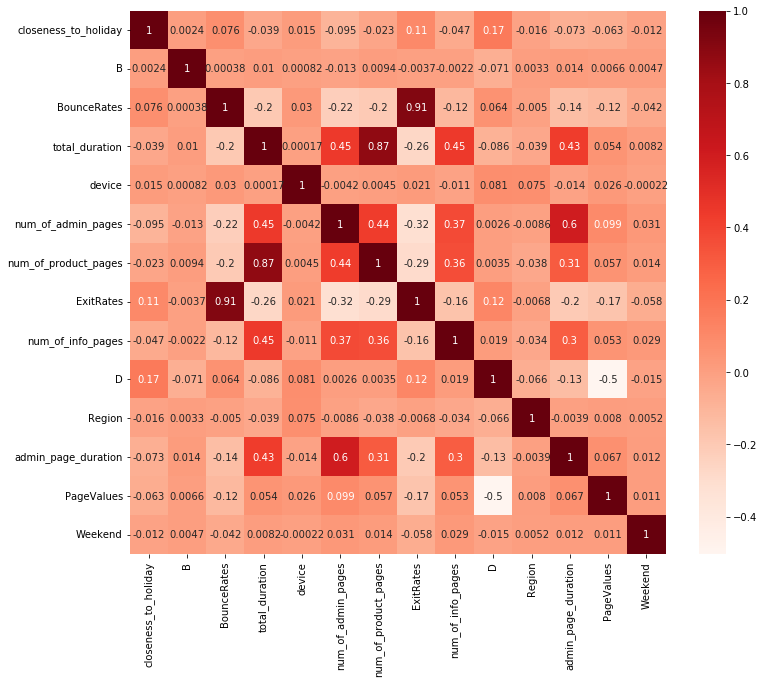

In [8]:
plt.figure(figsize=(12, 10))
train_cor = train.corr()
sns.heatmap(train_cor,
            annot=True,
            cmap=plt.cm.Reds,
            xticklabels=train_cor.columns,
            yticklabels=train_cor.columns)
plt.show()


In [9]:
# Plotting Functions

# Bar Plot
def bar_plot(x, kind, color, data, height, aspect, x_lab, y_lab, title, name=''):
    sns.catplot(x=x, kind=kind, color=color, data=data,
                height=height, aspect=aspect)
    plt.ylabel(y_lab)
    plt.xlabel(x_lab)
    plt.title(title)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    return plt


def categorical_distribution(df, col):
    plt.figure(figsize=(6, 5))
    df[col].value_counts().head(15).plot.barh()
    return plt.show


def continuous_distribution(df, col):
    plt.figure(figsize=(6, 5))
    df[col].hist()
    return plt.show

# Distributions Charts:


def distributions(df, col):
    sns.kdeplot(df[col], shade=True, color='darkturquoise')
    plt.title('KDE plot for column %s' % str(col))
    return plt

# Pie Plot


def pie_plot(size, lables, explode, colors, autopct, pctdistance, shadow, center, title, i, figsize):
    plt.figure(figsize=figsize)
    plt.pie(size, labels=lables, explode=explode, colors=colors, autopct=autopct, pctdistance=pctdistance,
            shadow=shadow, center=center)
    plt.title(title + ' ' + i)
    return plt

# Corellation Chart:


def corr_chart(df, graph=True):
    corr = df.corr()
    if graph:
        plt.matshow(corr)
        plt.show()
    return corr

# Corellation heatmap chart:


def corr_heat_chart(df, graph=True):
    sns.heatmap(df.corr(),
                xticklabels=df.corr().columns,
                yticklabels=df.corr().columns)
    return plt

# Box plot chart


def boxplot(df, name='box plot'):
    print('Box plot of all features:')
    df.plot.box(figsize=(18, 10), patch_artist=True)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    plt.show()

# Box plot chart


def boxplot_col(df, col_box):
    plt.figure(figsize=(6, 5))
    df.boxplot(column=col_box)
    #plt.plot([1], [0], label=df.describe()[col_box])
    # plt.legend()
    return plt.show()

# Scatter


def Scatter(df, col1, col2):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(df[col1], df[col2])
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    return plt.show()


def groupby_categorical(df, col):
    return df.groupby(col).size()


def continuous_results_by_column(df, col):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = df.select_dtypes(include=numerics)
    zero_df = newdf[newdf['purchase'] == 0]
    one_df = newdf[newdf['purchase'] == 1]
    num_of_bins = 100
    plt.figure()
    fig, ax = plt.subplots()
    ax.hist(zero_df[col], bins=num_of_bins, color='red')
    ax.hist(one_df[col], bins=num_of_bins, color='blue')
    ax.set_title(f'column is {col}')
    plt.plot([0, 0], [0, 0], color='red', linestyle='-',
             label='Number 0: %d Observations' % zero_df[col].count())
    plt.plot([0, 0], [0, 0], color='blue', linestyle='-',
             label='Number 1: %d Observations' % one_df[col].count())
    plt.legend()
    plt.show()


def categorical_results_by_column(df, col):
    newdf = df.copy()
    zero_df = newdf[newdf['purchase'] == 0]
    one_df = newdf[newdf['purchase'] == 1]
    z = zero_df[col].value_counts().head(15)
    o = one_df[col].value_counts().head(15)
    pd.DataFrame({('Number 0: %d Observations' % zero_df[col].count()): z,
                  ('Number 1: %d Observations' % one_df[col].count()): o},
                 index=z.index).plot.barh(color={"red", "blue"}, stacked=True)
    return plt.show()


def IQR_col(df):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


def results_by_null(df, col):
    zero_df = df[df['purchase'] == 0]
    zero_num = zero_df[df[col].isna()].shape[0]
    one_df = df[df['purchase'] == 1]
    one_num = one_df[df[col].isna()].shape[0]
    plt.figure()
    names = ['0', '1']
    values = [zero_num, one_num]
    plt.barh(names, values, color=['red', 'blue'])
    plt.plot([0, 0], [0, 0], color='red', linestyle='-',
             label='%d Observations' % zero_num)
    plt.plot([0, 0], [0, 0], color='blue', linestyle='-',
             label='%d Observations' % one_num)
    plt.xlabel('purchase')
    plt.ylabel('Number of null observations')
    plt.title(
        'Number of null observations in %s column \n divided into 0 (no purchase) and 1 (purchase)' % col)
    plt.legend()
    plt.show


In [10]:
def for_continuous(a, df, col):
    print("Percentage of Null cells: ", df[col].isnull().sum(), "/", train.shape[0],
          " --> ", round(float(df[col].isnull().sum()/train.shape[0])*100, 5), "%")
    print("\r")
    print("Percentage of nunique cells: ", df[col].nunique(), "/", train.shape[0],
          " --> ", round(float(df[col].nunique()/train.shape[0])*100, 5), "%")
    print("\r")
    print("Summary")
    print(df.describe()[col])
    print("\r")
    print("Number of outliers by IQR :", IQR_col(df)[col])
    continuous_distribution(df, col)
    boxplot_col(df, col)
    continuous_results_by_column(a, col)
    results_by_null(a, col)
    cor = df.corr()
    cor_relevant = cor[((cor[col] > 0.8) & (cor[col] < 1)) | (cor[col] < -0.8)]
    col2 = cor_relevant.index.tolist()
    if len(col2) > 0:
        Scatter(train, col, col2[0])


def for_categorical(a, df, col):
    print("Percentage of Null cells: ", df[col].isnull().sum(), "/", train.shape[0],
          " --> ", round(float(df[col].isnull().sum()/train.shape[0])*100, 5), "%")
    print("\r")
    print("Percentage of nunique cells: ", df[col].nunique(), "/", train.shape[0],
          " --> ", round(float(df[col].nunique()/train.shape[0])*100, 5), "%")
    print("\r")
    #print ("Number of outliers by IQR :", IQR_col(df)[col])
    #categorical_distribution(df, col)
    #print ("\r")
    print("The number of values in each category")
    print(groupby_categorical(df, col))
    categorical_results_by_column(a, col)
    results_by_null(a, col)


In [11]:
def numeric_column_ID(data, X, col):
    fig, axs = plt.subplots(figsize=(13, 7), nrows=2, ncols=3)

    # location:[0,0] - Summary of the data

    # describe the data
    summary = str(X.describe()[col])

    # Percentage of null cells
    Null = X[col].isnull().sum()
    rows = X.shape[0]
    ratio_null = round((float(Null/rows)*100), 5)
    info_null = 'Percentage of Null cells: \n %d / %d --> %.2f' % (
        Null, rows, ratio_null) + "%"

    # Percentage of unique cells
    unique = X[col].nunique()
    ratio_unique = round((float(unique/rows)*100), 5)
    info_unique = 'Percentage of unique cells: \n %d / %d --> %.2f' % (
        unique, rows, ratio_unique) + "%"

    axs[0, 0].set_title('Summary')
    axs[0, 0].plot([0, 0], [5, 5], label=summary)
    axs[0, 0].plot([0, 0], [5, 5], label=info_null)
    axs[0, 0].plot([0, 0], [5, 5], label=info_unique)
    axs[0, 0].legend(fontsize=10, loc='center')

    # location:[0,1] - Distribution of the data
    axs[0, 1].hist(X[col])
    axs[0, 1].set_title('Distribution')

    # location:[0,2] - Distribution of the data divided into purchase result
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = data.select_dtypes(include=numerics)
    zero_df = newdf[newdf['purchase'] == 0]
    one_df = newdf[newdf['purchase'] == 1]
    num_of_bins = 100
    axs[0, 2].hist(zero_df[col], bins=num_of_bins, color='red')
    axs[0, 2].hist(one_df[col], bins=num_of_bins, color='blue')
    axs[0, 2].set_title(
        'Distribution divided into \n 0 (no purchase) and 1 (purchase)')
    axs[0, 2].plot([0, 0], [0, 0], color='red', linestyle='-',
                   label='Number 0: \n %d Observations' % zero_df[col].count())
    axs[0, 2].plot([0, 0], [0, 0], color='blue', linestyle='-',
                   label='Number 1: \n %d Observations' % one_df[col].count())
    axs[0, 2].legend()

    # location:[1,0] - Number of null observations divided into purchase result
    zero_df1 = data[data['purchase'] == 0]
    zero_num = zero_df1[data[col].isna()].shape[0]
    one_df1 = data[data['purchase'] == 1]
    one_num = one_df1[data[col].isna()].shape[0]
    names = ['0', '1']
    values = [zero_num, one_num]
    axs[1, 0].barh(names, values, color=['red', 'blue'])
    axs[1, 0].plot([0, 0], [0, 0], color='red', linestyle='-',
                   label='%d Observations' % zero_num)
    axs[1, 0].plot([0, 0], [0, 0], color='blue', linestyle='-',
                   label='%d Observations' % one_num)
    axs[1, 0].set_xlabel('Number of null observations')
    axs[1, 0].set_ylabel('purchase')
    axs[1, 0].set_title(
        'Number of null observations divided into \n 0 (no purchase) and 1 (purchase)')
    axs[1, 0].legend()

    # location:[1,1] -  Distribution of the data
    cor = X.corr()
    cor_relevant = cor[((cor[col] > 0.8) & (cor[col] < 1)) | (cor[col] < -0.8)]
    col2 = cor_relevant.index.tolist()
    if len(col2) > 0:
        axs[1, 1].scatter(X[col], X[col2[0]])
        axs[1, 1].set_xlabel(col)
        axs[1, 1].set_ylabel(col2[0])
        axs[1, 1].set_title('High Correlation')
    else:
        axs[1, 1].legend(
            title="No high correlation with any other feature", loc='center')
        axs[1, 1].set_title('High Correlation')

    # location:[2,2] - Boxplot
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    num_iqr = str(((X[col] < (Q1 - 1.5 * IQR)) |
                   (X[col] > (Q3 + 1.5 * IQR))).sum())
    info_iqr = "Number of outliers \n by IQR:  " + num_iqr
    X.boxplot(col)
    axs[1, 2].set_title('Boxplot')
    axs[1, 2].legend(title=info_iqr, loc='upper left')

    plt.suptitle("%s - ID" % (col), fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.89)
    plt.show()


def categorical_column_ID(data, X, col):
    fig, axs = plt.subplots(figsize=(13, 4), nrows=1, ncols=3)

    # location:[0] - Summary of the data
    # describe the data
    summary = str(X.groupby(col).size())

    # Percentage of null cells
    Null = X[col].isnull().sum()
    rows = X.shape[0]
    ratio_null = round((float(Null/rows)*100), 5)
    info_null = 'Percentage of Null cells: \n %d / %d --> %.2f' % (
        Null, rows, ratio_null) + "%"

    # Percentage of unique cells
    unique = X[col].nunique()
    ratio_unique = round((float(unique/rows)*100), 5)
    info_unique = 'Percentage of unique cells: \n %d / %d --> %.2f' % (
        unique, rows, ratio_unique) + "%"

    axs[0].set_title('Summary')
    axs[0].plot([0, 0], [5, 5], label=summary)
    axs[0].plot([0, 0], [5, 5], label=info_null)
    axs[0].plot([0, 0], [5, 5], label=info_unique)
    axs[0].legend(fontsize=10, loc='center')

    # location:[0,1] - Distribution of the data divided into purchase result
    newdf = data.copy()
    zero_df = newdf[newdf['purchase'] == 0]
    one_df = newdf[newdf['purchase'] == 1]
    z = zero_df[col].value_counts().head(15)
    o = one_df[col].value_counts().head(15)
    axs[1].barh(z.index.tolist(), z, color='red')
    axs[1].barh(o.index.tolist(), o, color='blue')
    axs[1].set_title(
        'Distribution divided into \n 0 (no purchase) and 1 (purchase)')
    axs[1].plot([0, 0], [0, 0], color='red', linestyle='-',
                label='Number 0: \n %d Observations' % zero_df[col].count())
    axs[1].plot([0, 0], [0, 0], color='blue', linestyle='-',
                label='Number 1: \n %d Observations' % one_df[col].count())
    axs[1].legend()

    # location:[1,1] - Number of null observations divided into purchase result
    zero_df1 = data[data['purchase'] == 0]
    zero_num = zero_df1[data[col].isna()].shape[0]
    one_df1 = data[data['purchase'] == 1]
    one_num = one_df1[data[col].isna()].shape[0]
    names = ['0', '1']
    values = [zero_num, one_num]
    axs[2].barh(names, values, color=['red', 'blue'])
    axs[2].plot([0, 0], [0, 0], color='red', linestyle='-',
                label='%d Observations' % zero_num)
    axs[2].plot([0, 0], [0, 0], color='blue', linestyle='-',
                label='%d Observations' % one_num)
    axs[2].set_xlabel('Number of null observations')
    axs[2].set_ylabel('purchase')
    axs[2].set_title(
        'Number of null observations divided into \n 0 (no purchase) and 1 (purchase)')
    axs[2].legend()

    plt.suptitle("%s - ID" % (col), fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.75)
    plt.show()


####  Exploration on closeness_to_holiday

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


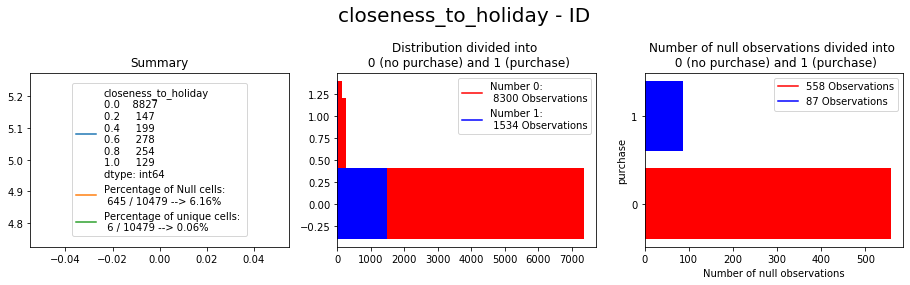

In [12]:
categorical_column_ID(data, train, "closeness_to_holiday")


####  Exploration on B

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


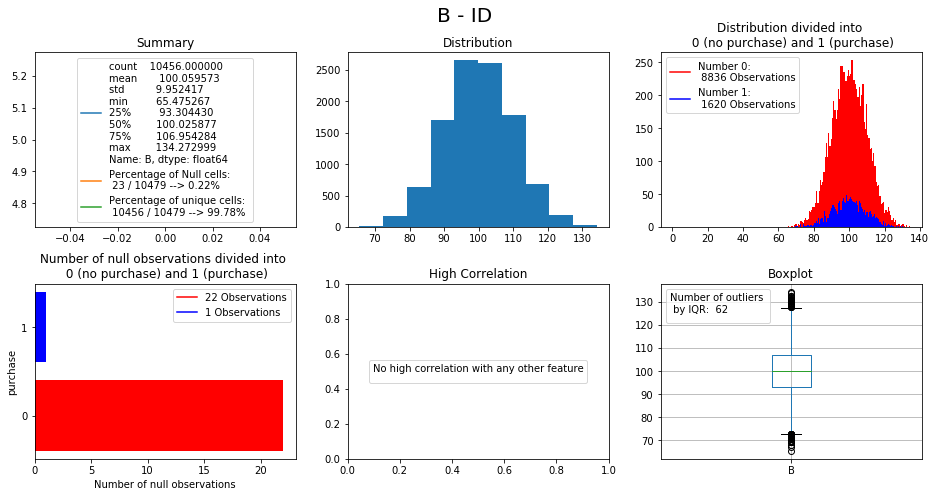

In [13]:
numeric_column_ID(data, train, "B")


####  Exploration on BounceRates

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.


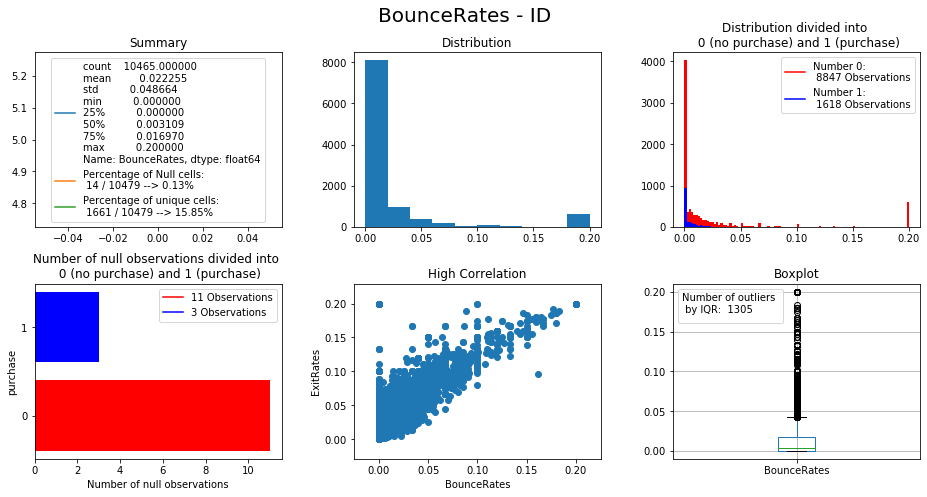

In [14]:
numeric_column_ID(data, train, "BounceRates")


####  Exploration on total_duration

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.


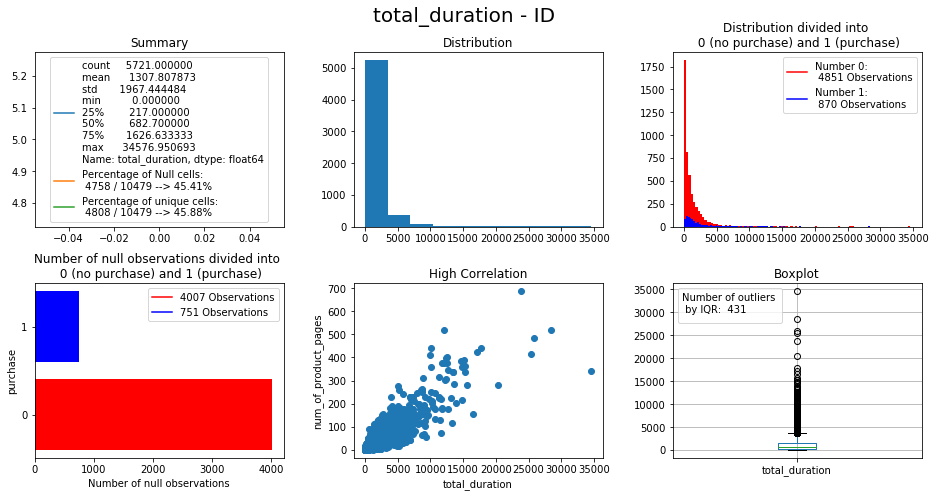

In [15]:
numeric_column_ID(data, train, "total_duration")


####  Exploration on num_of_admin_pages

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


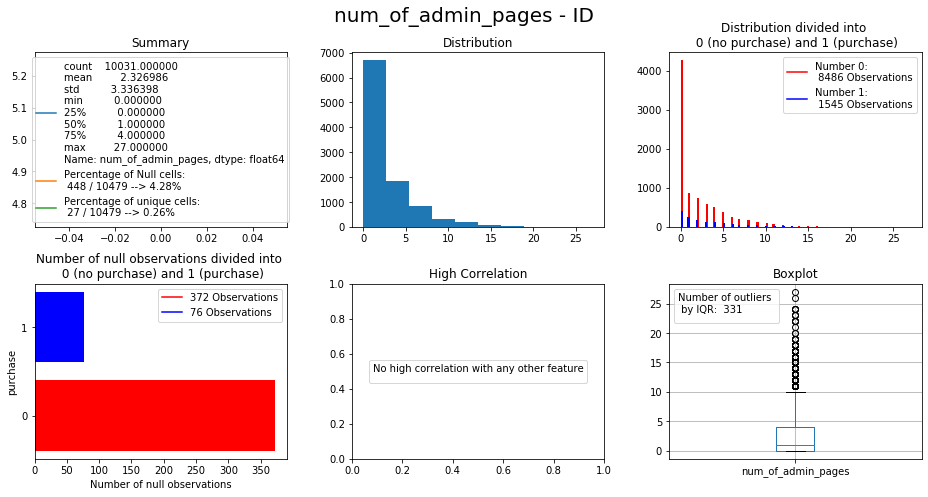

In [16]:
numeric_column_ID(data, train, "num_of_admin_pages")


####  Exploration on num_of_product_pages

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.


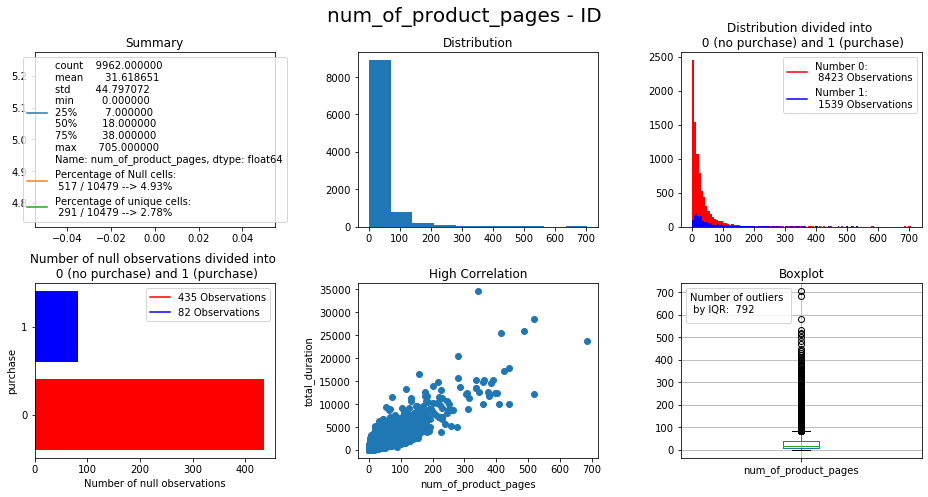

In [17]:
numeric_column_ID(data, train, "num_of_product_pages")


####  Exploration on ExitRates

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.


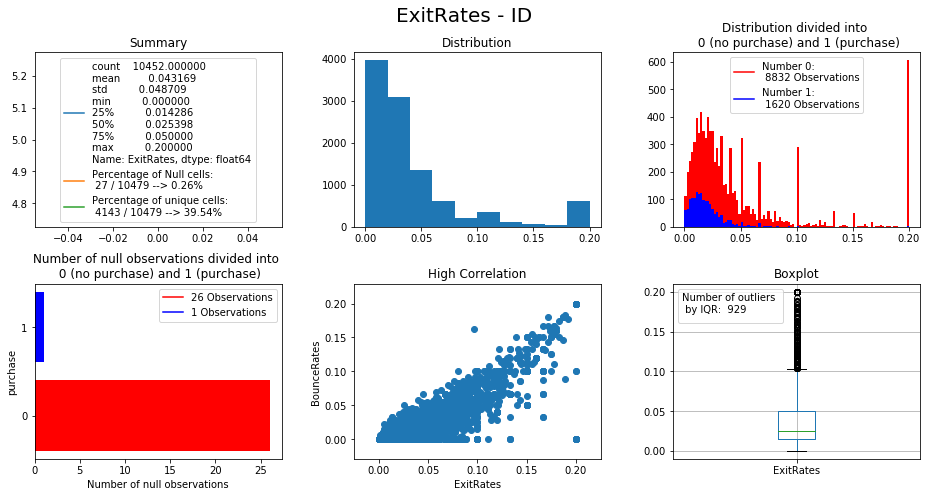

In [18]:
numeric_column_ID(data, train, "ExitRates")


####  Exploration on num_of_info_pages

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


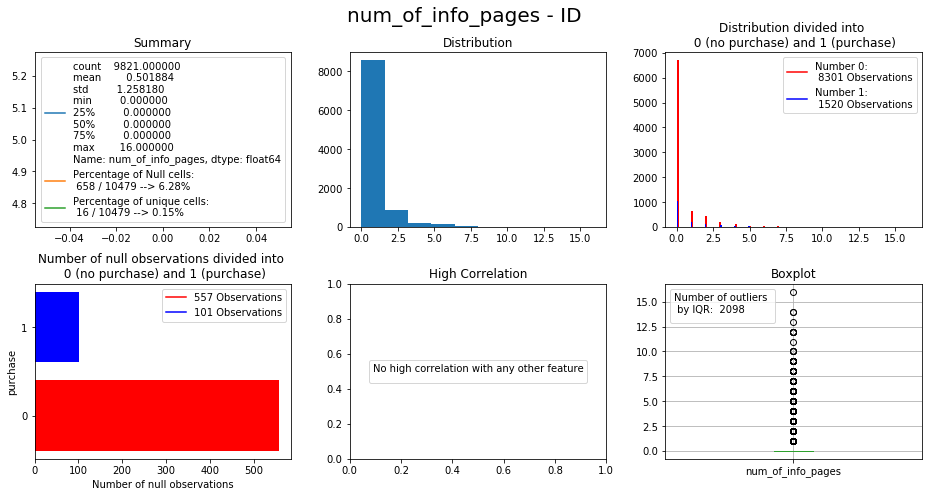

In [19]:
numeric_column_ID(data, train, "num_of_info_pages")


####  Exploration on D

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


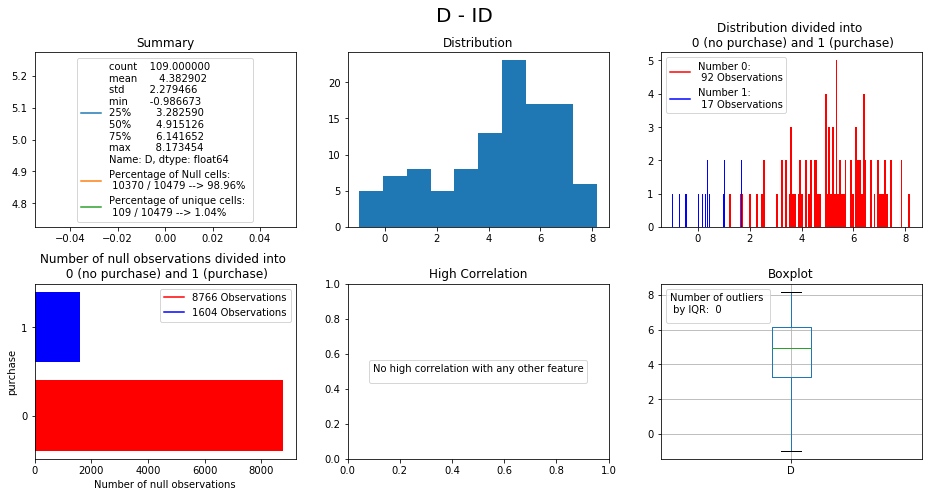

In [20]:
numeric_column_ID(data, train, "D")


####  Exploration on admin_page_duration

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


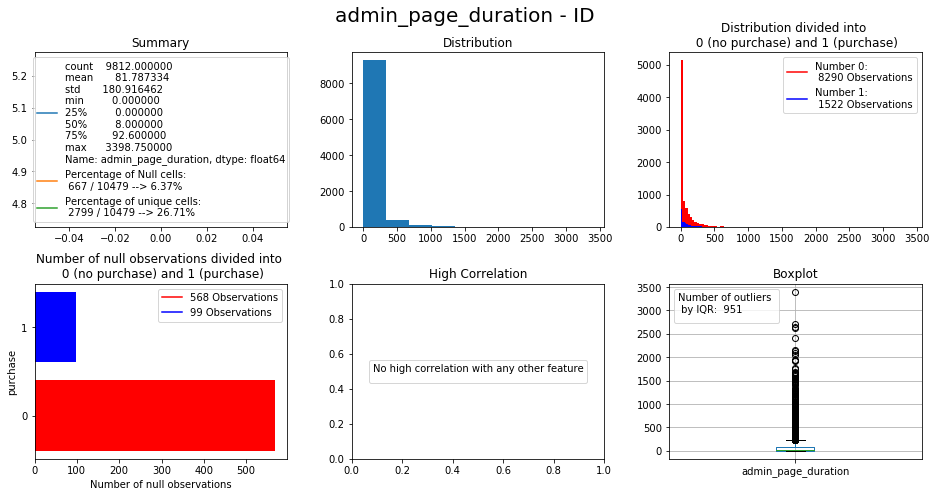

In [21]:
numeric_column_ID(data, train, "admin_page_duration")


####  Exploration on PageValues

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


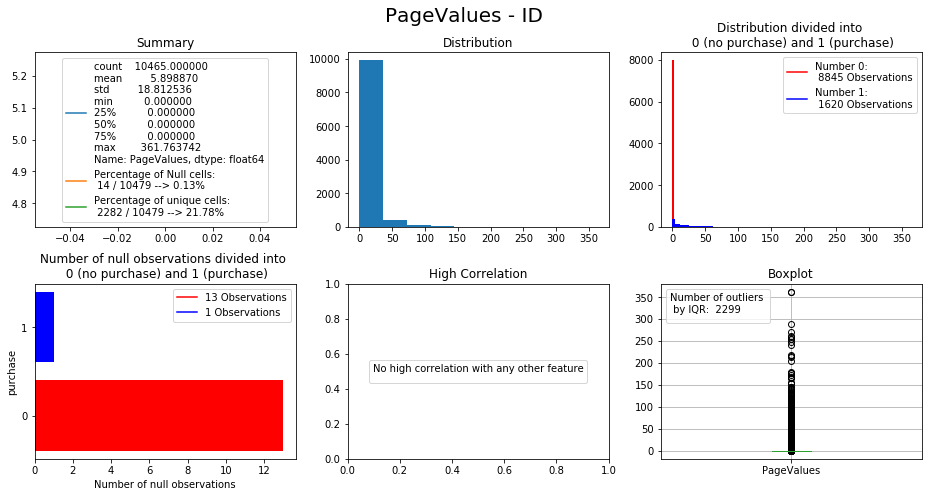

In [22]:
numeric_column_ID(data, train, "PageValues")


####  Exploration on Month

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


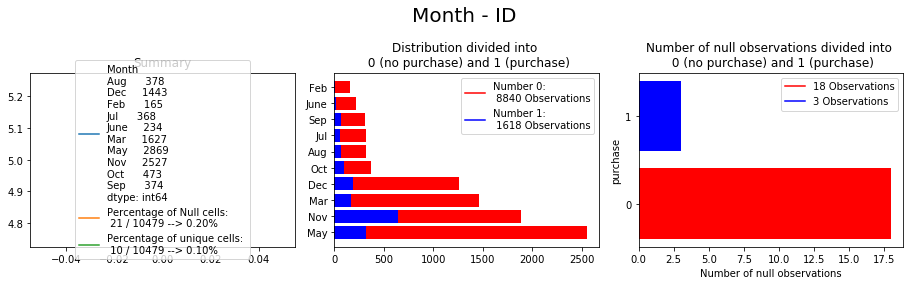

In [23]:
categorical_column_ID(data, train, "Month")


####  Exploration on device

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


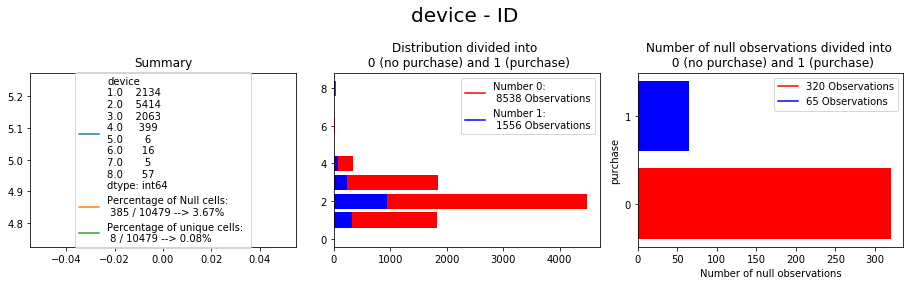

In [24]:
categorical_column_ID(data, train, "device")


####  Exploration on C

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


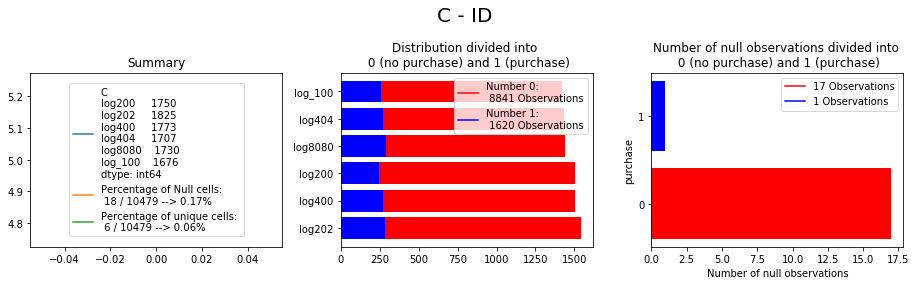

In [25]:
categorical_column_ID(data, train, "C")


####  Exploration on user_type

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


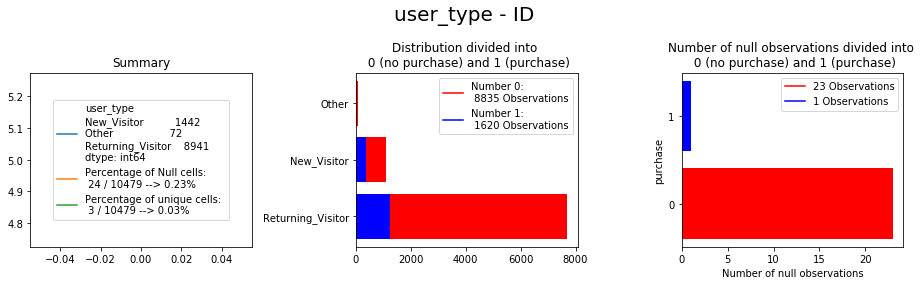

In [26]:
categorical_column_ID(data, train, "user_type")


####  Exploration on Region

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


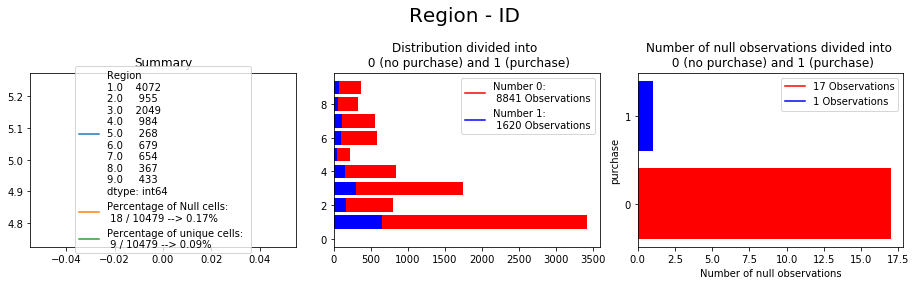

In [27]:
categorical_column_ID(data, train, "Region")


####  Exploration on A

אפשר לראות שהיא קטגוריאלית, אבל בפועל היא יותר מתאימה להיות רציפה. טווח יחסית גדול של ערכים, וה-C מפריע

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


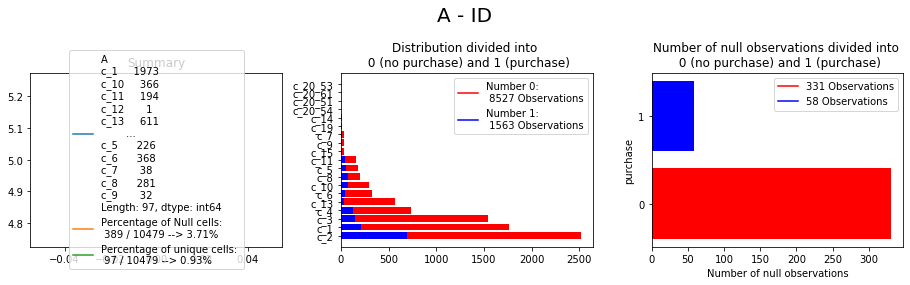

In [28]:
categorical_column_ID(data, train, "A")


####  Exploration on Weekend

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


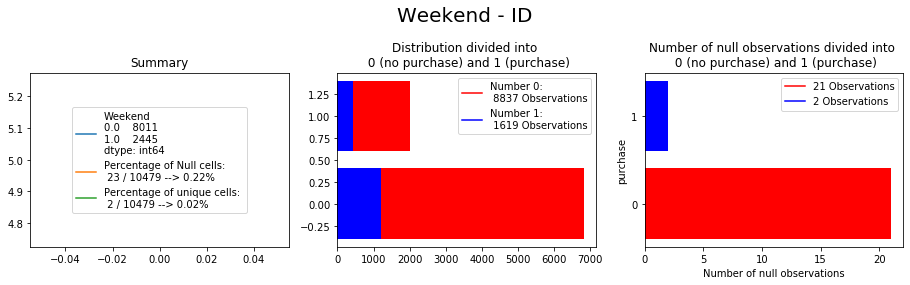

In [29]:
categorical_column_ID(data, train, "Weekend")


####  Exploration on internet_browser

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


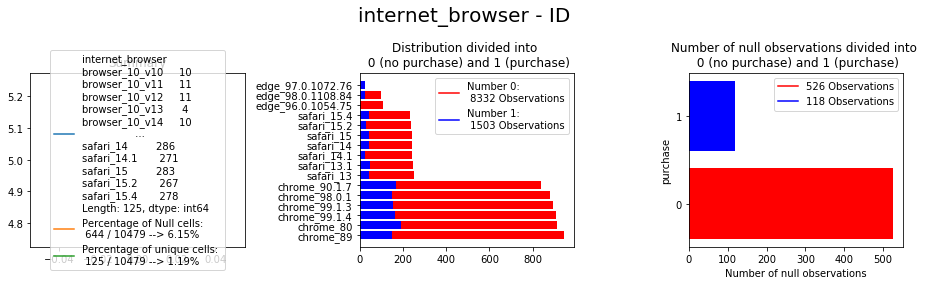

In [30]:
categorical_column_ID(data, train, "internet_browser")


####  Exploration on purchase - The Answer

<Figure size 432x288 with 0 Axes>

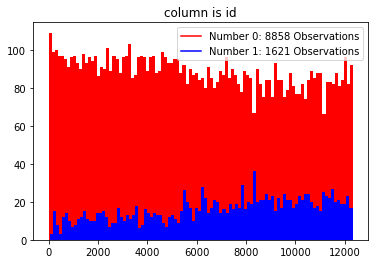

In [31]:
continuous_results_by_column(data, "id")


להוסיף
* שורה תחתונה לכל פיצ'ר

## Part B - Preprocessing

#### Convert to float

In [32]:
def to_float(text, start=None, end=None):
    try:
        return float(text[start:end])
    except TypeError:
        return text


In [33]:
train["product_page_duration"] = train["product_page_duration"].apply(
    to_float, end=-8)
train["info_page_duration"] = train["info_page_duration"].apply(
    to_float, end=-8)
train["A"] = train["A"].apply(to_float, start=2)


In [34]:
train.shape


(10479, 21)

#### Missing Value

In [35]:
# Deleting Missing Values - drop the entire column
def dropcol(df_in, col):
    df_in = df_in.drop(col, axis=1)
    return df_in

# Deleting Missing Values- dropna


def dropna(df_in):
    df_in.dropna()
    return df_in

# Drop columns with high correlation


def drop_high_corr(df_in):
    # Create correlation matrix
    corr_matrix = df_in.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find features with correlation greater than 0.8
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    # Drop features
    df_in.drop(to_drop, axis=1, inplace=True)
    return df_in

# Imputing Missing Values - fillna by mean (numerical)


def fillna_by_mean(df_in, col_name):
    col = df_in[col_name]
    col_mean = col.mean()
    col.fillna(col_mean, inplace=True)
    return

# Imputing Missing Values - fillna by median (numerical)


def fillna_by_median(df_in, col_name):
    col = df_in[col_name]
    col_median = col.median()
    col.fillna(col_median, inplace=True)
    return

# Imputing Missing Values - fillna by KNN (numerical)


def fillna_by_KNN(df_in, col_name, num):
    imputer = KNNImputer(n_neighbors=num)
    df_in[col_name] = pd.DataFrame(imputer.fit_transform(df_in[col_name]))
    return

# Imputing Missing Values - fillna by most frequent (categorical)


def fillna_by_most_frequent(df_in, col_name):
    col = df_in[col_name]
    col_freq = col.mode()
    col.fillna(col_freq[0], inplace=True)
    return


#### Split the "internet_browser" column to "browser" and "version"

In [36]:
# sperate the internet_browser data to browser and version
train['internet_browser'] = train['internet_browser'].str.replace('_v', '.')
train[['browser', 'version']] = train['internet_browser'].str.split(
    '_', expand=True)
train["version"] = train["version"].str.slice(0, 2)
train = dropcol(train, "internet_browser")
train = dropcol(train, "version")


In [37]:
train.shape


(10479, 21)

In [38]:
# fill the missing values in "durations" columns and then sum them and fill "total duration" column
fillna_by_KNN(train, ['product_page_duration',
                      'info_page_duration', 'admin_page_duration'], 10)
sum_duration = train["admin_page_duration"] + \
    train["info_page_duration"] + train["product_page_duration"]
train["total_duration"] = train["total_duration"].fillna(sum_duration)

# fill the rest numeric columns by KNN
fillna_by_KNN(train, ['num_of_admin_pages', 'num_of_product_pages', 'num_of_info_pages',
                      'PageValues', 'A', 'B', 'ExitRates', 'BounceRates'], 10)

# fill the categorical columns by most_frequent
fillna_by_most_frequent(train, "closeness_to_holiday")
fillna_by_most_frequent(train, "Month")
fillna_by_most_frequent(train, "device")
fillna_by_most_frequent(train, "C")
fillna_by_most_frequent(train, "user_type")
fillna_by_most_frequent(train, "Region")
fillna_by_most_frequent(train, "Weekend")
fillna_by_most_frequent(train, "browser")

# drop D
train = dropcol(train, "D")

# drop columns with high correlation
train = drop_high_corr(train)


c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [39]:
train.shape


(10479, 17)

#### maching the types of the data

In [40]:
# categorical columns
train['closeness_to_holiday'] = train['closeness_to_holiday'].astype(
    'category')
train['Month'] = train['Month'].astype('category')
train['device'] = train['device'].astype('category')
train['C'] = train['C'].astype('category')
train['user_type'] = train['user_type'].astype('category')
train['Region'] = train['Region'].astype('category')
train['Weekend'] = train['Weekend'].astype('category')
train['browser'] = train['browser'].astype('category')

# numeric columns
train['B'] = train['B'].astype('float64')
train['product_page_duration'] = train['product_page_duration'].astype(
    'float64')
train['BounceRates'] = train['BounceRates'].astype('float64')
train['info_page_duration'] = train['info_page_duration'].astype('float64')
train['num_of_admin_pages'] = train['num_of_admin_pages'].astype('int64')
train['num_of_info_pages'] = train['num_of_info_pages'].astype('int64')
train['admin_page_duration'] = train['admin_page_duration'].astype('float64')
train['PageValues'] = train['PageValues'].astype('float64')
train['A'] = train['A'].astype('float64')


In [41]:
train.shape


(10479, 17)

#### Categorical variables

In [42]:
def categorical_to_binary(df_in, col_name):
    frames = [df_in]
    for i in col_name:
        a = pd.get_dummies(df_in[i], prefix=i)
        frames.append(a)
    df_edited = pd.concat(frames, axis=1)
    df_out = df_edited.drop(columns=col_name)
    return df_out


def categorical_to_numeric(df_in, col_name, curr_val, new_val):
    df_in[col_name].replace(to_replace=curr_val, value=new_val, inplace=True)
    return


train = categorical_to_binary(train, [
                              "closeness_to_holiday", "device", "Region", "Month", "C", "Weekend", "browser", "user_type"])

# categorical_to_numeric(train, "Month", ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct","Nov","Dec"],
#                                         [1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12])


In [43]:
train.shape


(10479, 57)

##### Scaling and Normalization

In [44]:
def scaling_minmax(df_in):
    # We initialize our scaler
    min_max_scaler = MinMaxScaler()
    # We fit our scaler
    min_max_scaler.fit(df_in)
    # We transform our X using the scaler we have just fit.
    scaled_X = min_max_scaler.transform(df_in)
    return scaled_X


def scaling_standard(df_in):
    # We initialize our scaler
    standard_scaler = StandardScaler()
    # We fit our scaler
    standard_scaler.fit(df_in)
    # We transform our X using the scaler we have just fit.
    scaled_X = standard_scaler.transform(df_in)
    return pd.DataFrame(scaled_X)


train = scaling_standard(train)


In [45]:
train.shape


(10479, 57)

In [46]:
# Column concatenating, towards deleting outliers in all data concatenating
final_df = pd.concat([train, y], axis=1)


#### PCA

In [47]:
def PCA_method(df_in, n_components):
    # initialize PCA
    pca = PCA(n_components=n_components)
    # Fit the model with the data
    pca.fit(df_in)
    # apply the PCA on the data (or on new data)
    pca_result = pca.transform(df_in)
    df_out = pd.DataFrame(data=pca_result)
    df_out = pd.DataFrame(df_out)
    # Percentage of variance explained by each of the selected components (used for plotting also)
    # pca.explained_variance_ratio_
    return df_out


train_pca = train.copy()
train_pca = PCA_method(train_pca, 0.95)


In [48]:
final_df_pca = pd.concat([train_pca, y], axis=1)


#### Outliers - Check for outliers and remove if necessary

In [49]:
def remove_outliers_zscore(final_df, train, num_sd):
    df_out = final_df[(np.abs(stats.zscore(train)) < num_sd).all(axis=1)]
    return df_out


def remove_outliers_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1  # Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) &
                       (df_in[col_name] < fence_high)]
    return df_out


def remove_outliers_tails(df_in, col_name, L=0.05, U=0.05):
    lower = df_in[col_name].quantile(L)
    upper = df_in[col_name].quantile(1-U)
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out


def rows_selection(df_in, col_name, min_val=None, max_val=None):
    if min_val == None:
        min_val = df_in[col_name].min()
    if max_val == None:
        max_val = df_in[col_name].max()
    df_out = df_in[(df_in[col_name] >= min_val) & (df_in[col_name] <= max_val)]
    return df_out


final_df = remove_outliers_zscore(final_df, train, 5)
final_df_pca = remove_outliers_zscore(final_df_pca, train_pca, 5)

# we want to drop rows with too long duration?
#train = rows_selection(train, "total_duration", min_val=None, max_val=1000)


In [50]:
final_df_pca.shape
# y.shape


(10152, 44)

In [51]:
finalDf = pd.concat([train, y], axis=1)
finalDf.shape


(10479, 58)

#### Dimensionality Reduction (shoud be here or in PDF?)

### redividing of the data

In [52]:
X = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values
X_pca = final_df_pca.iloc[:, :-1].values
y_pca = final_df_pca.iloc[:, -1].values


## Part C - Running the models

We'll start by splitting the data into training and testing:

In [159]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y)
X_pca_train, X_pca_validate, y_pca_train, y_pca_validate = train_test_split(X_pca, y_pca)

Between KNN & Logistic Regression, we chose to implement **Logistic Regression**:

In [165]:
# Logistic Regression:
lgrParametersOptions = {
  'penalty': ['l1', 'l2'],
  'tol': [1e-4, 1e-3, 1e-2],
  'C': [1, 10, 100],
  'solver': ['liblinear'],
  'max_iter': [1000],
} 
lgr_gs_regular = GridSearchCV(LogisticRegression(), lgrParametersOptions, cv=3, scoring='roc_auc')
lgr_gs_pca = GridSearchCV(LogisticRegression(), lgrParametersOptions, cv=3, scoring='roc_auc')
lgr_gs_regular.fit(X_train, y_train)
lgr_gs_pca.fit(X_pca_train, y_pca_train)

print ('Regular Logistic Regression chosen parameters (recieved best AUC): {}'.format(lgr_gs_regular.best_params_))
print ("Regular Logistic Regression AUC score with the chosen parameters: ", lgr_gs_regular.best_score_)
print ('PCA Logistic Regression chosen parameters (recieved best AUC): {}'.format(lgr_gs_pca.best_params_))
print ("PCA Logistic Regression AUC score with the chosen parameters: ", lgr_gs_pca.best_score_)

Regular Logistic Regression chosen parameters (recieved best AUC): {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Regular Logistic Regression AUC score with the chosen parameters:  0.9027188805754585
PCA Logistic Regression chosen parameters (recieved best AUC): {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
PCA Logistic Regression AUC score with the chosen parameters:  0.8882766068750162


In [163]:
                     
lgr_clf_regular = LogisticRegression()
lgr_clf_pca = LogisticRegression()

lgr_clf_regular.fit(X_train, y_train)
lgr_clf_pca.fit(X_pca_train, y_pca_train)

print('Regular score:', lgr_clf_regular.score(X_train, y_train))
print('PCA score:', lgr_clf_pca.score(X_pca_train, y_pca_train))

Regular score: 0.885686274509804
PCA score: 0.8845547675334909


Between:

1. ANN
2. Decision Tree
3. Random Forest or Adaptive Boosting
4. Support Vectors Machine

We chose - ANN, Decision Tree & Random Forest:

In [167]:
# ANN:
annParametersOptions = {
  'activation' : ["logistic"],
  'hidden_layer_sizes' : [(100,), (50, 50), (20, 20, 10, 10, 10)],
  'alpha': [0.01, 0.1],
  'learning_rate_init' : [0.1, 0.01],
  'max_iter' : [500]
}

ann_gs_regular = GridSearchCV(MLPClassifier(), annParametersOptions, cv=3, scoring='roc_auc')
ann_gs_pca = GridSearchCV(MLPClassifier(), annParametersOptions, cv=3, scoring='roc_auc')

ann_gs_regular.fit(X_train, y_train)
ann_gs_pca.fit(X_pca_train, y_pca_train)

print ('Regular Neural Network chosen parameters (recieved best AUC): {}'.format(ann_gs_regular.best_params_))
print ("Regular Neural Network AUC score with the chosen parameters: ", ann_gs_regular.best_score_)
print ('PCA Neural Network chosen parameters (recieved best AUC): {}'.format(ann_gs_pca.best_params_))
print ("PCA Neural Network AUC score with the chosen parameters: ", ann_gs_pca.best_score_)

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Regular Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 1500}
Regular Neural Network AUC score with the chosen parameters:  0.8783959825514914
PCA Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 1500}
PCA Neural Network AUC score with the chosen parameters:  0.884352631114937


In [132]:
ann_clf_regular = MLPClassifier()
ann_clf_pca = MLPClassifier()

ann_clf_regular.fit(X_train, y_train)
ann_clf_pca.fit(X_pca_train, y_pca_train)

print('Regular score:', ann_clf_regular.score(X_train, y_train))
print('PCA score:', ann_clf_pca.score(X_pca_train, y_pca_train))

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Regular score: 0.9794117647058823
PCA score: 0.9730759127922248


c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [133]:
dt_clf_regular = DecisionTreeClassifier()
dt_clf_pca = DecisionTreeClassifier()

dt_clf_regular.fit(X_train, y_train)
dt_clf_pca.fit(X_pca_train, y_pca_train)

print('Regular score:', dt_clf_regular.score(X_train, y_train))
print('PCA score:', dt_clf_pca.score(X_pca_train, y_pca_train))

Regular score: 1.0
PCA score: 1.0


In [168]:
# Decision Tree:
dtParametersOptions = {
  'criterion': ['gini', 'entropy', 'log_loss'],
  'splitter': ['best', 'random'],
  'max_depth': [None, 10, 100],
  'max_features': [None, 'sqrt', 'log2']
}

dt_gs_regular = GridSearchCV(DecisionTreeClassifier(), dtParametersOptions, cv=3, scoring='roc_auc')
dt_gs_pca = GridSearchCV(DecisionTreeClassifier(), dtParametersOptions, cv=3, scoring='roc_auc')

dt_gs_regular.fit(X_train, y_train)
dt_gs_pca.fit(X_pca_train, y_pca_train)
print ('Regular Random Forest chosen parameters (recieved best AUC): {}'.format(dt_gs_regular.best_params_))
print ("Regular Random Forest AUC score with the chosen parameters: ", dt_gs_regular.best_score_)
print ('PCA Random Forest chosen parameters (recieved best AUC): {}'.format(dt_gs_pca.best_params_))
print ("PCA Random Forest AUC score with the chosen parameters: ", dt_gs_pca.best_score_)

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_cl

Regular Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'splitter': 'random'}
Regular Random Forest AUC score with the chosen parameters:  0.834223594300246
PCA Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'splitter': 'random'}
PCA Random Forest AUC score with the chosen parameters:  0.7210797105261815


c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_cl

In [134]:
rf_clf_regular = RandomForestClassifier()
rf_clf_pca = RandomForestClassifier()

rf_clf_regular.fit(X_train, y_train)
rf_clf_pca.fit(X_pca_train, y_pca_train)

print('Regular score:', rf_clf_regular.score(X_train, y_train))
print('PCA score:', rf_clf_pca.score(X_pca_train, y_pca_train))

Regular score: 1.0
PCA score: 1.0


In [169]:
# Random Forest:
rfParametersOptions = {
  'n_estimators': [90, 100, 200],
  'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [10, 100, 200],
  'max_features': ['sqrt', 'log2']
}

rf_gs_regular = GridSearchCV(RandomForestClassifier(), rfParametersOptions, cv=3, scoring='roc_auc')
rf_gs_pca = GridSearchCV(RandomForestClassifier(), rfParametersOptions, cv=3, scoring='roc_auc')

rf_gs_regular.fit(X_train, y_train)
rf_gs_pca.fit(X_pca_train, y_pca_train)
print ('Regular Random Forest chosen parameters (recieved best AUC): {}'.format(rf_gs_regular.best_params_))
print ("Regular Random Forest AUC score with the chosen parameters: ", rf_gs_regular.best_score_)
print ('PCA Random Forest chosen parameters (recieved best AUC): {}'.format(rf_gs_pca.best_params_))
print ("PCA Random Forest AUC score with the chosen parameters: ", rf_gs_pca.best_score_)

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\joblib\para

Regular Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Regular Random Forest AUC score with the chosen parameters:  0.9256509822310764
PCA Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
PCA Random Forest AUC score with the chosen parameters:  0.8731812347707507


In [ ]:
# SVM:
svmParametersOptions = {
  'C': [1, 10, 100],
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
  'tol': [1e-3, 1e-4, 1e-5],
  'max_iter': [10, 100, 200]
}

svm_clf = GridSearchCV(svm.SVC(), svmParametersOptions, cv=3, scoring='roc_auc')

svm_clf.fit(X_train, y_train)
print ('SVM chosen parameters (recieved best AUC): {}'.format(svm_clf.best_params_))
print ("SVM AUC score with the chosen parameters: ", svm_clf.best_score_)

## Part D - Models Evaluation:


The task is to build a confusion matrix for one of the models & explain what each cell means.
For it we will use our LogisticRegression model:

The train+validate score is: 0.8845547675334909


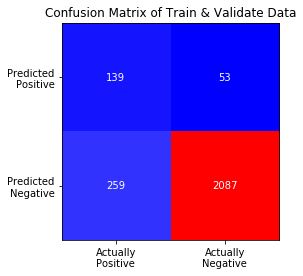

In [139]:
lgr_prediction = lgr_clf_pca.predict(X_pca_validate)
cm = confusion_matrix(y_pca_validate, lgr_prediction)
tn, fp, fn, tp = cm.ravel()

cm_tv= np.array([[tp,fp],[fn,tn]])

# Add labels for the matrix's plot:
predictions = ['Predicted\nPositive', 'Predicted\nNegative']
actualls = ['Actually\nPositive', 'Actually\nNegative']

fig, ax = plt.subplots()
im = ax.imshow(cm_tv, cmap='bwr')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(actualls)))
ax.set_xticklabels(actualls)
ax.set_yticks(np.arange(len(predictions)))
ax.set_yticklabels(predictions)

# Loop over data dimensions and create text annotations.
for i in range(len(predictions)):
    for j in range(len(actualls)):
        text = ax.text(j, i, cm_tv[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix of Train & Validate Data")
train_validate_score = lgr_clf_pca.score(
    np.concatenate((X_pca_train, X_pca_validate)),
    np.concatenate((y_pca_train, y_pca_validate))
  )
print(f'The train+validate score is: {train_validate_score}')
plt.show()

The top left cell is TP - It means how many times did the model predict a purchase and it was correct.

The top right cell is FP - The amount of times the model predicted a purchase and it was wrong.

The bottom left cell is FN - The amount of times the model predicted there won't be a purchase and there was.

The bottom right cell is TP - The amount of times the model predicted there won't be a purchase and there wasn't.

Our model got an 88% percent of guessing correctly on the train & validate data, which is okay, but we can see it has a bigger chance of getting a FN than a TP, which means we are missing more purchases than we actually may have.

Now we'll evaluate our models using a K-Fold Cross Validation:

In [160]:
def KfoldPlot(X, y, clf, k, ax, clfname, type, color='r'):
    # # initializes the KFOLD
    kf = KFold(n_splits=k, random_state=None, shuffle=False) 

    # sets an mean tpr and fpr.
    mean_tpr = np.zeros(200) 
    mean_fpr = np.linspace(0, 1, 200) # range of 200 valuves of axis x - fpr (at equal intervals)

    i = 1
    
    # iterates over each fold
    for train_index, validation_index in kf.split(X):          

        # Splits to train and validation 
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]

        # fits with X_train and y_train.
        clf.fit(X_train, y_train)
        
        # predicts by the probability of the vaulue "1" (not "0")
        prob_prediction = clf.predict_proba(X_validation)[:,1]
        
        # calculates ROC curve 
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        
        # adds the corresponding tpr values to the current ROC curve 
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0 # the left tail of the range
        
        # plots the current ROC of current fold with the color #E5E5E5
        ax.plot(fpr, tpr, color='#E5E5E5')
        i+=1
     
    # adds legend of "K-folds"
    ax.plot([0], [0], color='#E5E5E5', linestyle='-', label='K-folds')   
    
    # calculates the average of tpr values
    mean_tpr /= k
    mean_tpr[-1] = 1.0 #the right tail of the range
    mean_auc = auc(mean_fpr, mean_tpr) # the area under the ROC curve
    
    # plots the random-guess line 
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    # plots the mean roc - a magenta line.
    ax.plot(mean_fpr, mean_tpr, color=color, linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
    
    #Setting the graph.
       
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC for {clfname} on {type}') 
    ax.legend() 

c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\levan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

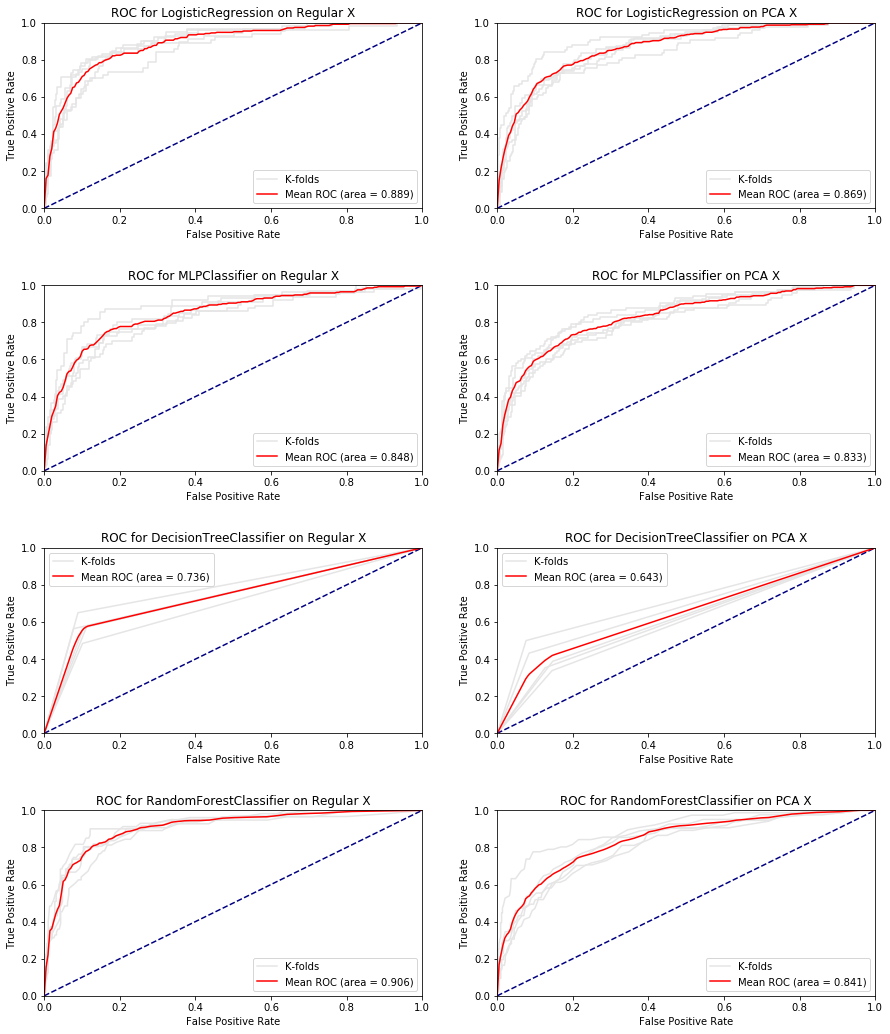

                    Model  Regular X     PCA X
0      LogisticRegression   0.889295  0.868648
1           MLPClassifier   0.847538  0.833101
2  DecisionTreeClassifier   0.736063  0.643193
3  RandomForestClassifier   0.905848  0.841149


In [156]:
models = [
    [lgr_clf_regular, lgr_clf_pca],
    [ann_clf_regular, ann_clf_pca],
    [dt_clf_regular, dt_clf_pca],
    [rf_clf_regular, rf_clf_pca]
]

Xs_validate = [X_validate, X_pca_validate]
ys_validate = [y_validate, y_pca_validate]

types = ['Regular X', 'PCA X']

fig, axs = plt.subplots(figsize=(13, 15), nrows=4, ncols=2)

for i in range(len(models)):
    # returns the name of the classifier
    for j in range(2):
        clf = models[i][j]
        clfname = str(clf)[:str(clf).find("(")]
        KfoldPlot(Xs_validate[j], ys_validate[j], models[i][j], 5, axs[i, j], clfname, types[j])

# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.tight_layout(pad=3.0)
plt.show()


Differences between Train & Validation for every model:

In [162]:
performance_cols = ['Model', 'Train', 'Validation']

performance_df = pd.DataFrame(columns=performance_cols)

models = [
    [lgr_clf_regular, lgr_clf_pca],
    [ann_clf_regular, ann_clf_pca],
    [dt_clf_regular, dt_clf_pca],
    [rf_clf_regular, rf_clf_pca]
]

Xs_train = [X_train, X_pca_train]
ys_train = [y_train, y_pca_train]
Xs_validate = [X_validate, X_pca_validate]
ys_validate = [y_validate, y_pca_validate]


for i in range(len(models)):
    for j in range(2):
        clf = models[i][j]
        clfname = f'{str(clf)[:str(clf).find("(")]} {types[j]}'
        d = {
          performance_cols[0]: clfname,
          performance_cols[1]: clf.score(Xs_train[j], ys_train[j]),
          performance_cols[2]: clf.score(Xs_validate[j], ys_validate[j]),
        }
        performance_df = performance_df.append(d, ignore_index=True)

performance_df['Difference'] = abs(performance_df[performance_cols[1]] - performance_df[performance_cols[2]])

performance_df

,Model,Train,Validation,Difference
0,LogisticRegression Regular X,0.887843,0.875294,0.012549
1,LogisticRegression PCA X,0.885080,0.879039,0.006042
2,MLPClassifier Regular X,0.893333,0.883529,0.009804
3,MLPClassifier PCA X,0.895324,0.889677,0.005647
4,DecisionTreeClassifier Regular X,0.877255,0.874118,0.003137
5,DecisionTreeClassifier PCA X,0.845679,0.836485,0.009194
6,RandomForestClassifier Regular X,0.915294,0.897647,0.017647
7,RandomForestClassifier PCA X,0.897688,0.892829,0.004859


#### on TEST SET

#### Something spicy???

In [53]:
"""def example_plot(ax, fontsize=12):
    ax.plot([2, 2])
    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

def boxplot_col(df, col_box, ax, fontsize=12):
    #plt.figure(figsize=(6,5))
    ax.boxplot(x = df[col_box])
    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
    #plt.plot([1], [0], label=df.describe()[col_box]) 
    #plt.legend() 

#plt.close('all')
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(234)
ax4 = plt.subplot(235)
ax5 = plt.subplot(133)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
#boxplot_col(train, "ExitRates", ax5)

#fig, ax = plt.subplots()
#ax.boxplot([train["ExitRates"]])

plt.tight_layout()"""


'def example_plot(ax, fontsize=12):\n    ax.plot([2, 2])\n    ax.locator_params(nbins=3)\n    ax.set_xlabel(\'x-label\', fontsize=fontsize)\n    ax.set_ylabel(\'y-label\', fontsize=fontsize)\n    ax.set_title(\'Title\', fontsize=fontsize)\n\ndef boxplot_col(df, col_box, ax, fontsize=12):\n    #plt.figure(figsize=(6,5))\n    ax.boxplot(x = df[col_box])\n    ax.locator_params(nbins=3)\n    ax.set_xlabel(\'x-label\', fontsize=fontsize)\n    ax.set_ylabel(\'y-label\', fontsize=fontsize)\n    ax.set_title(\'Title\', fontsize=fontsize)\n    #plt.plot([1], [0], label=df.describe()[col_box]) \n    #plt.legend() \n\n#plt.close(\'all\')\nfig = plt.figure(figsize=(10,6))\nax1 = plt.subplot(231)\nax2 = plt.subplot(232)\nax3 = plt.subplot(234)\nax4 = plt.subplot(235)\nax5 = plt.subplot(133)\n\nexample_plot(ax1)\nexample_plot(ax2)\nexample_plot(ax3)\nexample_plot(ax4)\n#boxplot_col(train, "ExitRates", ax5)\n\n#fig, ax = plt.subplots()\n#ax.boxplot([train["ExitRates"]])\n\nplt.tight_layout()'

KeyError: 'ExitRates'

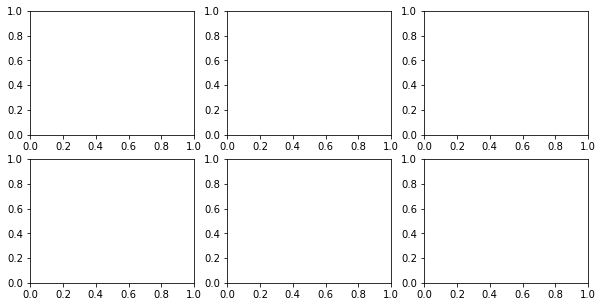

In [54]:
fig, axs = plt.subplots(figsize=(10, 5),
                        nrows=2, ncols=3)

axs[0, 0].hist(train["ExitRates"])
axs[0, 0].set_title('Dis')

axs[0, 1].hist(train["ExitRates"])
axs[0, 1].set_title('step')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = train.select_dtypes(include=numerics)
zero_df = newdf[newdf['purchase'] == 0]
one_df = newdf[newdf['purchase'] == 1]
num_of_bins = 100
axs[1, 0].hist(zero_df["ExitRates"], bins=num_of_bins, color='red')
axs[1, 0](one_df["ExitRates"], bins=num_of_bins, color='blue')
axs[1, 0].set_title(f'column is {"ExitRates"}')
#plt.plot([0, 0], [0, 0], color='red', linestyle='-', label='Number 0: %d Observations' % zero_df[col].count())
#plt.plot([0, 0], [0, 0], color='blue', linestyle='-', label='Number 1: %d Observations' % one_df[col].count())

# Create a histogram by providing the bin edges (unequally spaced).
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
axs[1, 1].boxplot(d2)
axs[1, 1].set_title('boxplot')

#axs[grid[:,2]].hist(x, 20, density=True, histtype='step', facecolor='g', alpha=0.75)
# axs[grid[:,2]].set_title('step')

fig.tight_layout()
plt.show()


KeyError: 'ExitRates'

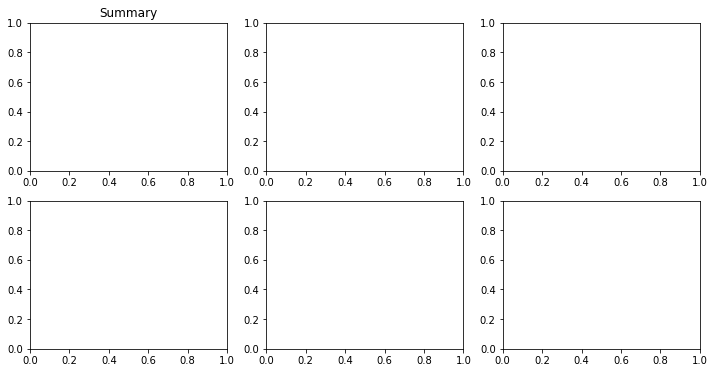